In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
car_data = pd.read_csv('../Resources/mpg.csv')
car_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
car_data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [4]:
car_data['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [5]:
print(car_data.isna().sum())
print(car_data.shape)

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64
(398, 9)


In [6]:
# Remove the rows with missing values in horsepower
car_data = car_data.dropna(subset=['horsepower'])
# car_data = car_data[car_data['horsepower']!="?"]
car_data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [7]:
# Set the 'car name' as our index
car_data.set_index('car name')

# Remove the 'origin' column
car_data = car_data.drop('origin', axis=1)

In [8]:
# Convert the "horsepower" column to numeric so the data can be used
# car_data['horsepower'] = car_data['horsepower'].astype(int)

car_data['horsepower'] = pd.to_numeric(car_data['horsepower'], errors='coerce')
car_data = car_data.dropna(subset=['horsepower'])
print(car_data.shape)

(392, 8)


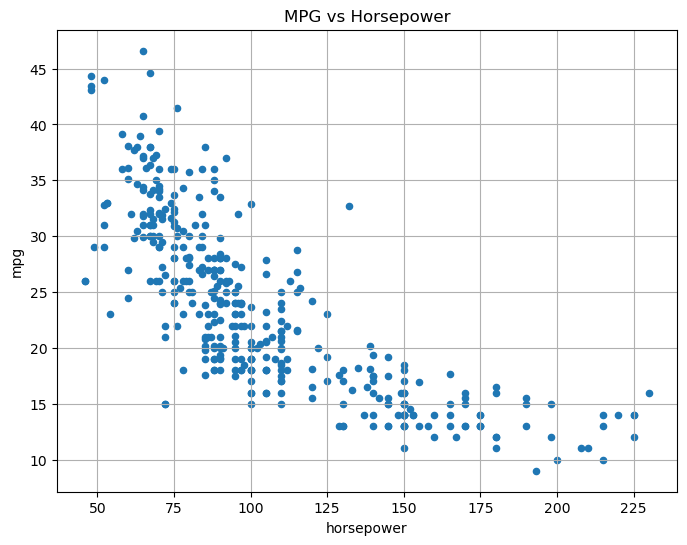

In [9]:
# Create a scatter plot which compares MPG to horsepower
car_data.plot(kind='scatter', title="MPG vs Horsepower", grid=True,
              x='horsepower', y='mpg', figsize=(8,6))
plt.show()

In [ ]:
car_data['log_horsepower'] = np.log(car_data['horsepower'])

In [ ]:
# Create a scatter plot which compares MPG to horsepower
car_data.plot(kind='scatter', title="MPG vs Horsepower", grid=True,
              x='log_horsepower', y='mpg', figsize=(8,6)) # grid=True
plt.show()

In [ ]:
car_data.dtypes

In [ ]:
car_data.columns

In [ ]:
df = car_data[['mpg', 'cylinders', 'displacement', 'horsepower', 
          'weight', 'acceleration', 'model year']].corr()

# df.style.background_gradient(cmap='coolwarm')

In [ ]:
mask = np.zeros_like(df, dtype=bool)
mask[np.triu_indices_from(mask)] = True
df[mask] = np.nan
(df
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(color='#f1f1f1')  # Color NaNs grey
 .format(precision=2))

In [ ]:
# import seaborn as sns
# sns.heatmap(df, 
#             xticklabels=df.columns.values,
#             yticklabels=df.columns.values)